In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lightweight_clustered_energy_forecasts.utils.paths import data_dir
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
building_2a=pd.read_csv(data_dir("raw","2A.csv"),parse_dates=["timestamp"],index_col="timestamp")

In [15]:
building_2a_hourly=building_2a["value"].to_frame()

In [16]:
building_2a_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34954 entries, 2023-01-01 00:00:00+00:00 to 2023-12-31 23:45:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   34954 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [17]:
building_2a_hourly.shape

(34954, 1)

In [18]:
building_2a_hourly.isna().sum()

value    0
dtype: int64

In [19]:
building_2a_hourly.index.isna().sum()

np.int64(0)

In [20]:
building_2a_hourly.index.duplicated().any()

np.False_

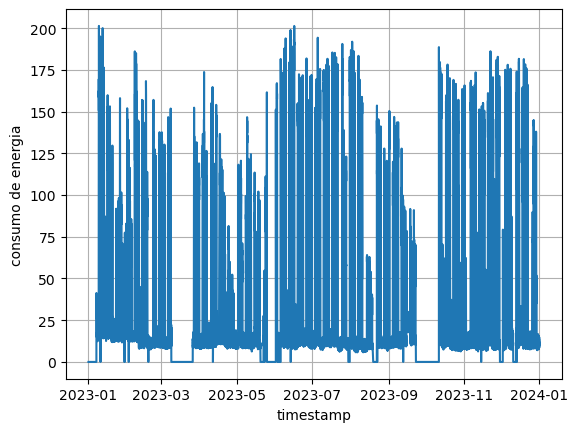

In [21]:
ax=sns.lineplot(building_2a_hourly["value"])
ax.grid()
ax.set_ylabel('consumo de energia');

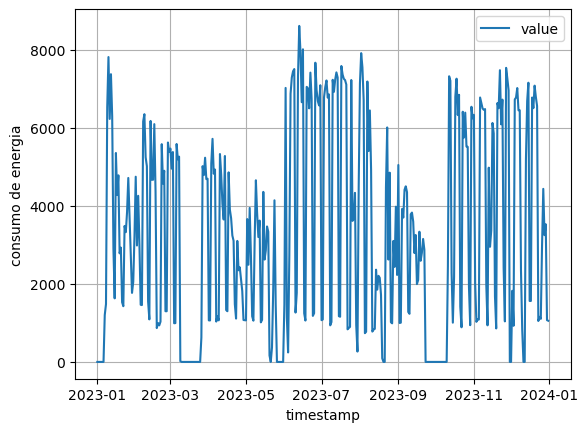

In [31]:
building_2a_day=building_2a_hourly.resample("D").sum()
ax=sns.lineplot(building_2a_day)
ax.grid()
ax.set_ylabel('consumo de energia');

1. **Patrones de consumo:**
   - El consumo de energía parece ser **variable** en diferentes periodos.
   - Hay fluctuaciones regulares, lo que podría indicar ciclos naturales o patrones estacionales.

2. **Caídas a cero:**
   - En ciertos momentos, el consumo cae completamente a **cero**. Esto podría deberse a:
     - Periodos en los que no hubo actividad posiblemente a periodos de vacaciones.
     - Problemas de medición o datos faltantes.
     - Cortes de suministro de energía.

3. **Picos de consumo:**
   - Hay momentos de **altos picos**, especialmente alrededor de julio de 2023, donde se observa un valor máximo cercano a 8,000 unidades.
   - Esto podría reflejar:
     - Días o periodos de alta actividad energética.
     - Eventos específicos que demandaron un consumo extraordinario.

4. **Tendencia general:**
   - A pesar de las fluctuaciones, parece no haber una tendencia clara de aumento o disminución en el consumo general durante el periodo analizado.

In [32]:
building_2a_hourly.describe()

,value
count,34954.000000
mean,34.648688
std,47.701314
min,0.000000
25%,9.030000
50%,12.400000
75%,34.357500
max,201.340000


In [40]:
building_2a_day['media_movil'] = building_2a_day['value'].rolling(window=7).mean()
building_2a_day

,value,media_movil
timestamp,,
2023-01-01 00:00:00+00:00,0.00,NaN
2023-01-02 00:00:00+00:00,0.00,NaN
2023-01-03 00:00:00+00:00,0.00,NaN
2023-01-04 00:00:00+00:00,0.00,NaN
2023-01-05 00:00:00+00:00,0.00,NaN
...,...,...
2023-12-27 00:00:00+00:00,4436.79,3438.478571
2023-12-28 00:00:00+00:00,3249.85,2931.994286
2023-12-29 00:00:00+00:00,3528.71,2498.982857


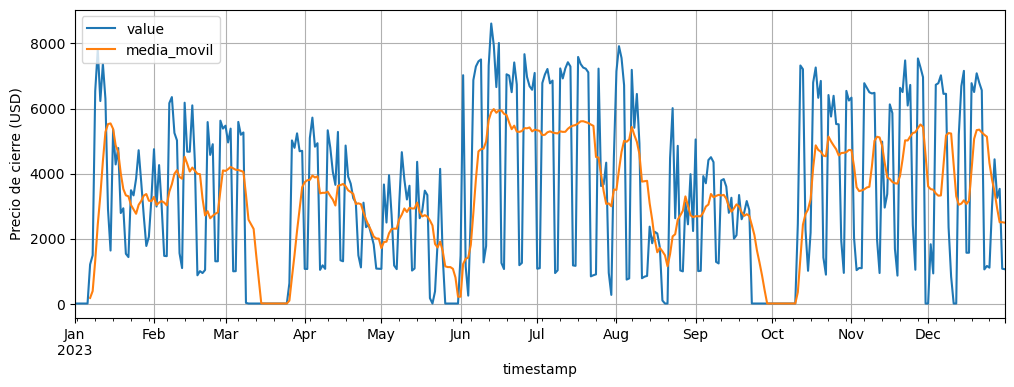

In [41]:
ax = building_2a_day.plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('Precio de cierre (USD)');

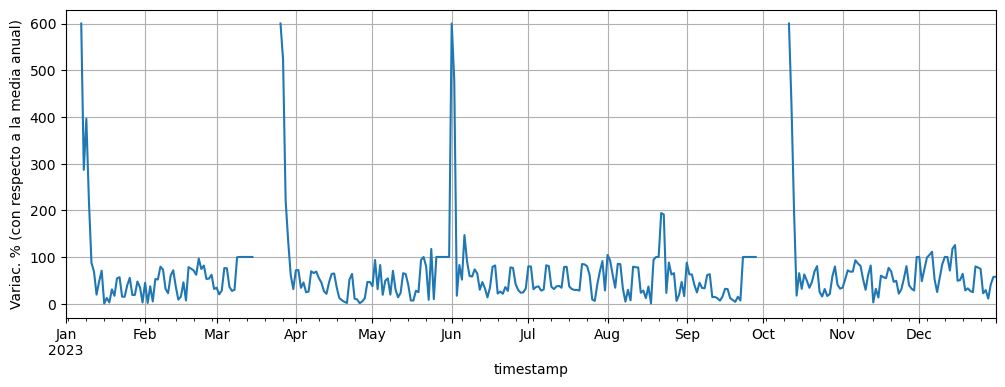

In [42]:
building_2a_day['cambio_%'] = 100*abs((building_2a_day['value']-building_2a_day['media_movil'])/(building_2a_day['media_movil']))
ax = building_2a_day['cambio_%'].plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('Variac. % (con respecto a la media anual)');

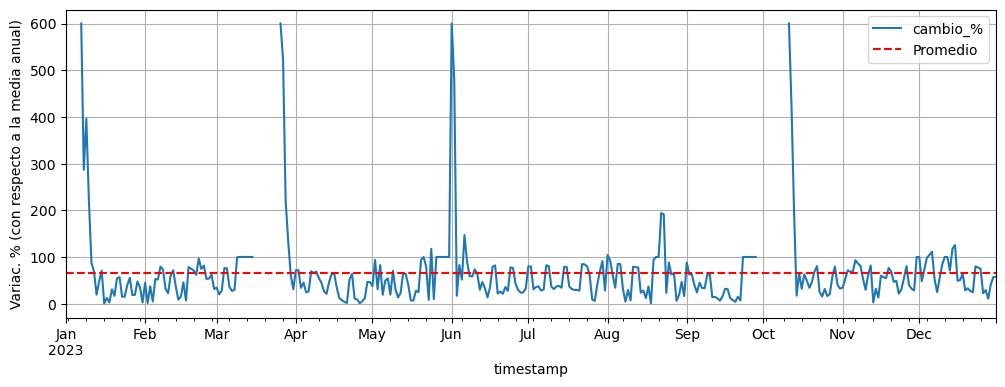

In [43]:
ax = building_2a_day['cambio_%'].plot(figsize=(12,4))

# Añadir promedio
ax.hlines(building_2a_day['cambio_%'].mean(),xmin=building_2a_day.index.min(), xmax=building_2a_day.index.max(),
          color='r', linestyle='--', label='Promedio')
ax.grid()
ax.legend()
ax.set_ylabel('Variac. % (con respecto a la media anual)');

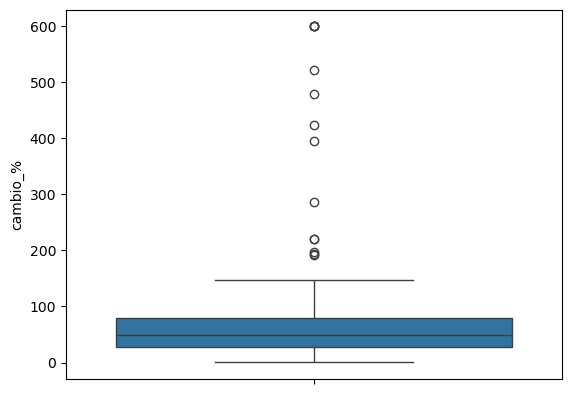

In [47]:
import seaborn as sns

sns.boxplot(building_2a_day['cambio_%']);

In [52]:
# Buscar valores extremos
outliers = building_2a_day[building_2a_day['cambio_%']>80]['value']
outliers

timestamp
2023-01-07 00:00:00+00:00    1202.72
2023-01-08 00:00:00+00:00    1483.89
2023-01-09 00:00:00+00:00    6535.53
2023-01-10 00:00:00+00:00    7816.27
2023-01-11 00:00:00+00:00    6229.79
                              ...   
2023-12-10 00:00:00+00:00     828.38
2023-12-11 00:00:00+00:00       0.00
2023-12-12 00:00:00+00:00       0.00
2023-12-14 00:00:00+00:00    6689.06
2023-12-15 00:00:00+00:00    7158.27
Name: value, Length: 77, dtype: float64

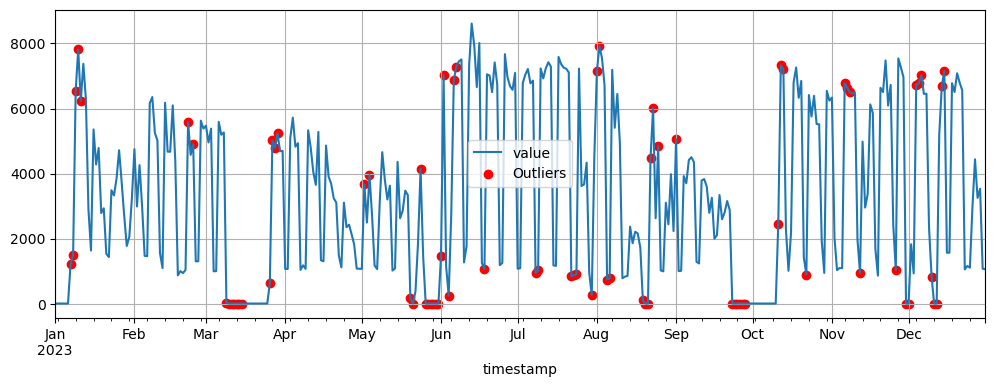

In [53]:
# Graficar serie de tiempo original
ax = building_2a_day['value'].plot(figsize=(12,4))

# Y superponer (en rojo) los valores extremos
ax.scatter(outliers.index, outliers, color='r', label='Outliers')

# Grilla y etiquetas
ax.legend()
ax.grid();